In [118]:
import pandas as pd
df=pd.read_csv('stock market ka data-copy1.txt')
df

,Date,Open,High,Low,Close,Volume,OpenInt
0,2008-08-15,44.886,44.886,44.886,44.886,112,0
1,2008-08-18,44.564,44.564,43.875,43.875,28497,0
2,2008-08-19,43.283,43.283,43.283,43.283,112,0
3,2008-08-20,43.918,43.918,43.892,43.892,4468,0
4,2008-08-22,44.097,44.097,44.017,44.071,4006,0
...,...,...,...,...,...,...,...
2320,2017-11-06,75.900,76.530,75.890,76.530,1313730,0
2321,2017-11-07,76.490,76.580,76.090,76.185,1627277,0
2322,2017-11-08,76.370,76.590,76.290,76.570,681128,0
2323,2017-11-09,76.040,76.200,75.580,76.110,1261567,0


In [119]:
df1=df.drop(['Date','OpenInt','Volume'],axis=1)
df1

,Open,High,Low,Close
0,44.886,44.886,44.886,44.886
1,44.564,44.564,43.875,43.875
2,43.283,43.283,43.283,43.283
3,43.918,43.918,43.892,43.892
4,44.097,44.097,44.017,44.071
...,...,...,...,...
2320,75.900,76.530,75.890,76.530
2321,76.490,76.580,76.090,76.185
2322,76.370,76.590,76.290,76.570
2323,76.040,76.200,75.580,76.110


In [120]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler(feature_range=(0,10))
scaled_df1=scale.fit_transform(df1)
scaled_df1

array([[ 4.00303605,  3.90131769,  4.45070771,  4.1155932 ],
       [ 3.94193548,  3.83937674,  4.27205739,  3.92782854],
       [ 3.69886148,  3.59295951,  4.16744712,  3.81788129],
       ...,
       [ 9.9772296 , 10.        , 10.        , 10.        ],
       [ 9.91461101,  9.92497836,  9.87453835,  9.91456801],
       [ 9.92789374,  9.9153602 ,  9.92578325,  9.90899636]])

In [121]:
df1.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

In [122]:
df2=pd.DataFrame(scaled_df1,columns=df1.columns) # df2 is a data frame that have scaled values of df1
df2.head()

,Open,High,Low,Close
0,4.003036,3.901318,4.450708,4.115593
1,3.941935,3.839377,4.272057,3.927829
2,3.698861,3.592960,4.167447,3.817881
3,3.819355,3.715110,4.275061,3.930986
4,3.853321,3.749543,4.297150,3.964230


In [123]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df2[['Open','Low','Close']],df2.High,test_size=0.4)

In [124]:
from sklearn.linear_model import LinearRegression
l=LinearRegression()

In [125]:
l.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
len(y_test)

930

In [127]:
y_test

667     6.355872
130     0.418775
446     4.399154
905     5.201308
1071    5.252669
          ...   
832     4.413196
761     4.610753
190     2.614600
1253    5.484851
849     4.305857
Name: High, Length: 930, dtype: float64

In [129]:
l1=l.predict(x_test)
l1

array([6.3372527 , 0.40812075, 4.33506114, 5.24189468, 5.29368331,
       7.41371711, 6.23939081, 5.02024476, 9.00445365, 5.71115318,
       6.26991324, 4.19831421, 4.64389629, 4.07146739, 6.33596766,
       0.38723487, 5.49411175, 2.61472946, 4.93112674, 6.63883802,
       4.68639643, 4.79689839, 5.09927808, 6.04152303, 0.89648528,
       4.50004013, 4.94521584, 6.46572096, 5.85843903, 4.48244758,
       5.32086501, 6.62690338, 6.26885089, 4.77584621, 4.89278881,
       5.3151209 , 5.17664405, 4.5552679 , 6.6908236 , 6.05198243,
       6.3753887 , 6.17663808, 5.50529236, 1.34312819, 6.05288854,
       6.16766288, 5.0717504 , 4.9795847 , 6.77288022, 9.74985359,
       2.89565108, 6.22150293, 6.61349102, 1.02978798, 4.00949901,
       4.7011757 , 4.98555535, 8.78457593, 4.58187892, 1.88020755,
       7.34265462, 5.77747455, 4.92292252, 3.80797671, 6.26990617,
       6.00232588, 5.068899  , 6.41641277, 5.38715569, 4.29307126,
       6.89184332, 4.9037157 , 6.17591177, 0.54393206, 5.45926

In [130]:
compared_values=pd.DataFrame(y_test)

In [131]:
compared_values['predicted high']=l1

In [132]:
compared_values

,High,predicted high
667,6.355872,6.337253
130,0.418775,0.408121
446,4.399154,4.335061
905,5.201308,5.241895
1071,5.252669,5.293683
...,...,...
832,4.413196,4.439096
761,4.610753,4.633610
190,2.614600,2.682922
1253,5.484851,5.509218


In [133]:
type(l1)

numpy.ndarray

In [134]:
import numpy as np
len(y_train)

1395

In [135]:
l.score(x_test,y_test)

0.9990779839491185

In [136]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,l1))
print('MSE:',metrics.mean_squared_error(y_test,l1))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test,l1)))

MAE: 0.026097236676155763
MSE: 0.0026664924205671266
RMSE: 0.1615463917150605


In [137]:
dm=pd.DataFrame(l1)
dm

,0
0,6.337253
1,0.408121
2,4.335061
3,5.241895
4,5.293683
...,...
925,4.439096
926,4.633610
927,2.682922
928,5.509218


In [138]:
x_test

,Open,Low,Close
667,6.398672,6.583379,6.388641
130,0.477609,1.100882,0.633497
446,4.212144,4.645438,4.596241
905,5.262998,5.562722,5.361972
1071,5.309867,5.625453,5.420288
...,...,...,...
832,4.455787,4.804651,4.583983
761,4.589753,4.856249,4.797192
190,2.720304,3.170822,2.860114
1253,5.543833,5.836440,5.615110


In [139]:
type(x_test)

pandas.core.frame.DataFrame

In [140]:
#do=pd.DataFrame(x_test)
#do.head()

In [141]:
x_test['predicted_high']=l1


In [142]:
x_test

,Open,Low,Close,predicted_high
667,6.398672,6.583379,6.388641,6.337253
130,0.477609,1.100882,0.633497,0.408121
446,4.212144,4.645438,4.596241,4.335061
905,5.262998,5.562722,5.361972,5.241895
1071,5.309867,5.625453,5.420288,5.293683
...,...,...,...,...
832,4.455787,4.804651,4.583983,4.439096
761,4.589753,4.856249,4.797192,4.633610
190,2.720304,3.170822,2.860114,2.682922
1253,5.543833,5.836440,5.615110,5.509218


In [143]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(x_test[['Open','Low','Close']],x_test.predicted_high,test_size=0.3)

In [144]:
len(y_test1)

279

In [145]:
len(y_test)

930

In [146]:
l.fit(x_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [147]:
s=l.predict(x_test1)
s

array([6.4566276 , 6.26885089, 8.7761351 , 6.12502692, 1.07914713,
       4.3635525 , 5.84257948, 8.04813051, 8.35217939, 4.55152763,
       4.95813688, 0.52871599, 6.85214199, 5.54638424, 5.29368331,
       5.926087  , 4.78944832, 4.17754159, 7.24416072, 4.9627221 ,
       4.19803506, 4.24702057, 9.39299157, 4.7011757 , 5.77232922,
       1.16940367, 5.77747455, 5.6837013 , 5.23109747, 4.53091301,
       9.00637371, 4.80914482, 4.77144563, 6.46574467, 8.19985571,
       8.26807462, 5.42338474, 6.76407472, 5.40437991, 5.80463725,
       6.04421975, 5.94710432, 5.27624592, 5.76081855, 5.64960723,
       5.74256154, 4.21872576, 4.28773073, 6.56077916, 6.33596766,
       6.00232588, 6.07995938, 5.50600734, 6.96746256, 7.29839579,
       5.664359  , 6.29271906, 7.08365498, 5.50665562, 5.91521621,
       6.24059552, 4.97934763, 5.84596204, 4.93112674, 0.8378108 ,
       5.53730068, 4.52998073, 6.98759369, 6.54493705, 4.63272855,
       0.87922134, 6.23608911, 6.29524015, 5.4511814 , 5.72964

In [148]:
type(s)

numpy.ndarray

In [149]:
compared_values1=pd.DataFrame(y_test1)
compared_values1.reset_index(drop=True,inplace=True)

In [150]:
compared_values1['predicted High1']=s

In [151]:
compared_values1

,predicted_high,predicted High1
0,6.456628,6.456628
1,6.268851,6.268851
2,8.776135,8.776135
3,6.125027,6.125027
4,1.079147,1.079147
...,...,...
274,6.390907,6.390907
275,0.618746,0.618746
276,5.935041,5.935041
277,4.354376,4.354376


In [152]:
len(compared_values1['predicted High1'])

279

In [153]:
print('MAE:',metrics.mean_absolute_error(y_test1,s))
print('MSE:',metrics.mean_squared_error(y_test1,s))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test1,s)))

MAE: 3.0899217871735986e-16
MSE: 3.1297535101993466e-31
RMSE: 1.7578173361227265e-08


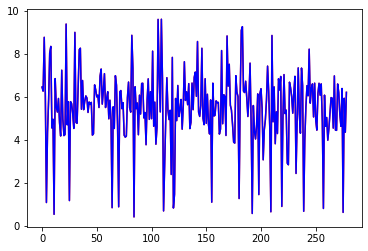

In [154]:
import matplotlib.pyplot as plt
plt.plot(compared_values1.predicted_high,color='red',label='realprice')
plt.plot(compared_values1['predicted High1'],color='blue',label='predicted')
plt.show()

In [39]:
if 5.20889583954957e-16 < 3.909258420758974e-15 :
    print('correct')
else:
    print('wrong')     

correct


In [155]:
l.score(x_test1,y_test1)

1.0

In [156]:
from sklearn.neighbors import KNeighborsRegressor
k=KNeighborsRegressor(n_neighbors=5)
k.fit(x_train1,y_train1)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [157]:
u=k.predict(x_test1)
u

array([6.46157998, 6.26385964, 8.8248291 , 6.11338922, 1.06921587,
       4.36799942, 5.84818542, 8.04043991, 8.25884541, 4.56770083,
       4.97534538, 0.51752586, 6.84680867, 5.50815363, 5.29205142,
       5.93444961, 4.78246222, 4.21746979, 7.25072769, 4.97068198,
       4.22082155, 4.26739882, 9.3505166 , 4.70301555, 5.75658148,
       1.19137169, 5.76783084, 5.67598147, 5.23645114, 4.51340893,
       9.0174151 , 4.82246408, 4.78375229, 6.45679491, 8.1646929 ,
       8.25884541, 5.42671129, 6.74573434, 5.38764744, 5.81372962,
       6.05041773, 5.94674571, 5.28755976, 5.75658148, 5.66378147,
       5.75441888, 4.20837248, 4.31296292, 6.58672609, 6.33700182,
       5.99361176, 6.083619  , 5.4713124 , 6.95486604, 7.32820475,
       5.67598147, 6.32832742, 7.0798649 , 5.50676223, 5.92022135,
       6.22882453, 4.96295396, 5.86127092, 4.92360098, 0.83844226,
       5.53910547, 4.50408233, 6.98291718, 6.49659682, 4.62749929,
       0.83844226, 6.23398406, 6.29601119, 5.46258238, 5.72058

In [158]:
compared_values1['predicted_high2_KNN']=u
compared_values1.reset_index(drop=True,inplace=True)
compared_values1

,predicted_high,predicted High1,predicted_high2_KNN
0,6.456628,6.456628,6.461580
1,6.268851,6.268851,6.263860
2,8.776135,8.776135,8.824829
3,6.125027,6.125027,6.113389
4,1.079147,1.079147,1.069216
...,...,...,...
274,6.390907,6.390907,6.373314
275,0.618746,0.618746,0.557976
276,5.935041,5.935041,5.931953
277,4.354376,4.354376,4.360017


In [159]:
print('MAE:',metrics.mean_absolute_error(y_test1,u))
print('MSE:',metrics.mean_squared_error(y_test1,u))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test1,u)))

MAE: 0.01688240607141244
MSE: 0.000717925218356355
RMSE: 0.12993231342284506


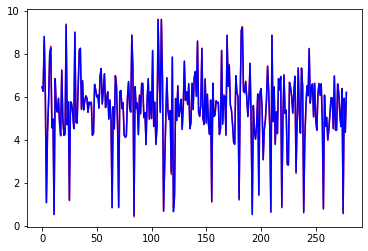

In [160]:
plt.plot(compared_values1.predicted_high,color='red',label='realprice')
plt.plot(compared_values1['predicted_high2_KNN'],color='blue',label='predicted')
plt.show()

In [161]:
from sklearn.svm import SVR
m=SVR(kernel='linear') 
m.fit(x_train1,y_train1)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [181]:
v=m.predict(x_test1)
v

array([6.44439087, 6.26025402, 8.70723481, 6.10583686, 1.11652676,
       4.3741439 , 5.8506105 , 8.00966678, 8.26825067, 4.56214422,
       4.98145079, 0.60572237, 6.80335736, 5.52694401, 5.28905474,
       5.92404694, 4.78031946, 4.19649902, 7.21079646, 4.96894738,
       4.20275286, 4.24801779, 9.32911535, 4.70665305, 5.75294357,
       1.23499769, 5.76369098, 5.66815339, 5.23193625, 4.52004399,
       8.94595239, 4.81744661, 4.78265905, 6.44712056, 8.14416632,
       8.22644985, 5.4208071 , 6.72760263, 5.3995353 , 5.80617172,
       6.04531079, 5.93979516, 5.28354318, 5.7485582 , 5.64928355,
       5.74207435, 4.17370948, 4.31028585, 6.53963635, 6.3121082 ,
       5.99922965, 6.07322444, 5.47484081, 6.93516597, 7.26977607,
       5.66313816, 6.29102939, 7.04861775, 5.50094996, 5.90250159,
       6.22087843, 4.96543855, 5.84131561, 4.94141304, 0.8827294 ,
       5.54237495, 4.53279696, 6.96126156, 6.49739442, 4.6523253 ,
       0.94245544, 6.20921307, 6.27283399, 5.4519876 , 5.71891

In [163]:
print('MAE:',metrics.mean_absolute_error(y_test1,v))
print('MSE:',metrics.mean_squared_error(y_test1,v))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test1,v)))

MAE: 0.021726621784908775
MSE: 0.0008759665286375411
RMSE: 0.14739953115566132


In [164]:
compared_values1['predicted_high3_SVR']=v

In [165]:
compared_values1

,predicted_high,predicted High1,predicted_high2_KNN,predicted_high3_SVR
0,6.456628,6.456628,6.461580,6.444391
1,6.268851,6.268851,6.263860,6.260254
2,8.776135,8.776135,8.824829,8.707235
3,6.125027,6.125027,6.113389,6.105837
4,1.079147,1.079147,1.069216,1.116527
...,...,...,...,...
274,6.390907,6.390907,6.373314,6.357969
275,0.618746,0.618746,0.557976,0.648129
276,5.935041,5.935041,5.931953,5.930185
277,4.354376,4.354376,4.360017,4.369567


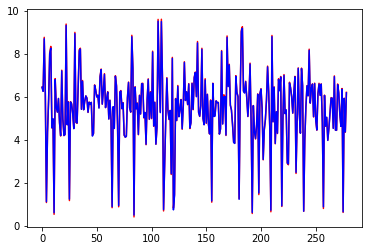

In [166]:
plt.plot(compared_values1.predicted_high,color='red',label='realprice')
plt.plot(compared_values1['predicted_high3_SVR'],color='blue',label='predicted')
plt.show()

In [167]:
from sklearn import tree
t=tree.DecisionTreeRegressor()
t.fit(x_train1,y_train1)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [168]:
t1=t.predict(x_test1)
t1

array([6.46296113, 6.24412976, 8.78457593, 6.09761229, 1.14369645,
       4.36637653, 5.86724979, 7.98511422, 8.30610264, 4.56890656,
       5.0252229 , 0.54393206, 6.9256349 , 5.5036062 , 5.31154575,
       5.94310825, 4.77584621, 4.20822491, 7.27089794, 4.97918638,
       4.2181919 , 4.2682493 , 9.42699491, 4.68639643, 5.71659579,
       1.14369645, 5.76782305, 5.6787704 , 5.239787  , 4.53090795,
       9.01071687, 4.8170395 , 4.79689839, 6.46854485, 8.26791742,
       8.26791742, 5.4210065 , 6.80786065, 5.39804977, 5.81300436,
       6.05422273, 5.94602249, 5.25818252, 5.76274824, 5.63529041,
       5.75291011, 4.07146739, 4.3441911 , 6.50938162, 6.26282005,
       6.00641194, 6.07381898, 5.48564313, 6.96081167, 7.31937236,
       5.63529041, 6.32915663, 7.07688876, 5.47175702, 5.90861877,
       6.22150293, 4.91388227, 5.83873365, 4.91772341, 0.85741686,
       5.54721346, 4.56076549, 6.98525236, 6.51697435, 4.64389629,
       0.85741686, 6.22150293, 6.26282005, 5.45780947, 5.72376

In [169]:
print('MAE:',metrics.mean_absolute_error(y_test1,t1))
print('MSE:',metrics.mean_squared_error(y_test1,t1))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test1,t1)))

MAE: 0.026803909560097774
MSE: 0.0016172521347616615
RMSE: 0.16371899572162593


In [170]:
compared_values1['predicted_high4_DT']=t1

In [171]:
compared_values1

,predicted_high,predicted High1,predicted_high2_KNN,predicted_high3_SVR,predicted_high4_DT
0,6.456628,6.456628,6.461580,6.444391,6.462961
1,6.268851,6.268851,6.263860,6.260254,6.244130
2,8.776135,8.776135,8.824829,8.707235,8.784576
3,6.125027,6.125027,6.113389,6.105837,6.097612
4,1.079147,1.079147,1.069216,1.116527,1.143696
...,...,...,...,...,...
274,6.390907,6.390907,6.373314,6.357969,6.398657
275,0.618746,0.618746,0.557976,0.648129,0.559473
276,5.935041,5.935041,5.931953,5.930185,5.948436
277,4.354376,4.354376,4.360017,4.369567,4.374847


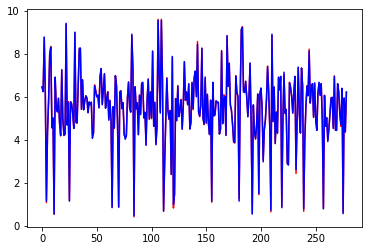

In [172]:
plt.plot(compared_values1.predicted_high,color='red',label='realprice')
plt.plot(compared_values1['predicted_high4_DT'],color='blue',label='predicted')
plt.show()

In [173]:
from sklearn.ensemble import RandomForestRegressor
ran=RandomForestRegressor()

In [174]:
ran.fit(x_train1,y_train1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [175]:
rf=ran.predict(x_test1)
rf

array([6.46034009, 6.26620801, 8.77451656, 6.10984465, 1.13169626,
       4.36515782, 5.86577872, 8.05129647, 8.27812484, 4.56900247,
       4.99397862, 0.52956884, 6.84721425, 5.52890388, 5.29622055,
       5.93808582, 4.77806017, 4.21744329, 7.24944039, 4.96966999,
       4.21563445, 4.27311934, 9.42108471, 4.70063946, 5.76292606,
       1.20102794, 5.7665071 , 5.68027316, 5.23282457, 4.52404677,
       9.00856635, 4.81598268, 4.79326981, 6.4678341 , 8.17277454,
       8.27112717, 5.42820195, 6.75571724, 5.39105112, 5.81113011,
       6.0532367 , 5.94709867, 5.28136016, 5.75599223, 5.64330344,
       5.75008114, 4.11988097, 4.34021475, 6.57269033, 6.31443252,
       6.0153114 , 6.07991957, 5.47958028, 6.96435711, 7.30027707,
       5.65903192, 6.32351975, 7.07797486, 5.48143499, 5.92225588,
       6.22313974, 4.94236664, 5.84961941, 4.92469201, 0.81949021,
       5.55535808, 4.53764467, 6.98873199, 6.51808025, 4.63549144,
       0.86608448, 6.22399395, 6.27690841, 5.45591387, 5.72606

In [176]:
print('MAE:',metrics.mean_absolute_error(y_test1,rf))
print('MSE:',metrics.mean_squared_error(y_test1,rf))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test1,rf)))

MAE: 0.014786956475898717
MSE: 0.0004964863518798476
RMSE: 0.12160163023536616


In [177]:
ran.score(x_test1,y_test1)

0.9998341144040018

In [178]:
compared_values1['predicted_high5_RF']=rf

In [179]:
compared_values1

,predicted_high,predicted High1,predicted_high2_KNN,predicted_high3_SVR,predicted_high4_DT,predicted_high5_RF
0,6.456628,6.456628,6.461580,6.444391,6.462961,6.460340
1,6.268851,6.268851,6.263860,6.260254,6.244130,6.266208
2,8.776135,8.776135,8.824829,8.707235,8.784576,8.774517
3,6.125027,6.125027,6.113389,6.105837,6.097612,6.109845
4,1.079147,1.079147,1.069216,1.116527,1.143696,1.131696
...,...,...,...,...,...,...
274,6.390907,6.390907,6.373314,6.357969,6.398657,6.396605
275,0.618746,0.618746,0.557976,0.648129,0.559473,0.560113
276,5.935041,5.935041,5.931953,5.930185,5.948436,5.936571
277,4.354376,4.354376,4.360017,4.369567,4.374847,4.362231


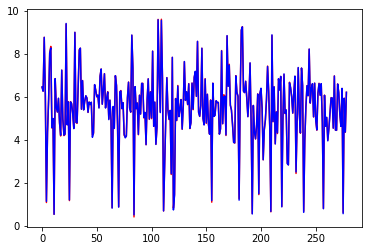

In [180]:
plt.plot(compared_values1.predicted_high,color='red',label='realprice')
plt.plot(compared_values1['predicted_high5_RF'],color='blue',label='predicted')
plt.show()